# Generate Dataset CSV path


## KITTI Dataset

https://www.kaggle.com/datasets/sakshaymahna/kittiroadsegmentation

Dataset location:

```
/hdd/team_2/KITTI
```

names:
    0: off-road
    1: on-road

In [1]:
import cv2

import os
import glob
import pandas as pd

In [2]:
kitti_path = '/hdd/team_2/KITTI/training/'
images_train = os.path.join(kitti_path, 'image_2')
masks_train = os.path.join(kitti_path, 'gt_image_2')

path_kitty_images = sorted(glob.glob(os.path.join(images_train, "**/*.png"), recursive=True))
path_kitty_masks = sorted(glob.glob(os.path.join(masks_train, "**/*_road_*.png"), recursive=True))

df_train = pd.DataFrame(columns=['rgb_path','mask_path','target'])
df_train['rgb_path'] = path_kitty_images
df_train['mask_path'] = path_kitty_masks

df_train['target'] = 1
df_train['dataset'] = "KITTY"
df_kitti_train = df_train.copy()
df_kitti_train.head()

,rgb_path,mask_path,target,dataset
0,/hdd/team_2/KITTI/training/image_2/um_000000.png,/hdd/team_2/KITTI/training/gt_image_2/um_road_...,1,KITTY
1,/hdd/team_2/KITTI/training/image_2/um_000001.png,/hdd/team_2/KITTI/training/gt_image_2/um_road_...,1,KITTY
2,/hdd/team_2/KITTI/training/image_2/um_000002.png,/hdd/team_2/KITTI/training/gt_image_2/um_road_...,1,KITTY
3,/hdd/team_2/KITTI/training/image_2/um_000003.png,/hdd/team_2/KITTI/training/gt_image_2/um_road_...,1,KITTY
4,/hdd/team_2/KITTI/training/image_2/um_000004.png,/hdd/team_2/KITTI/training/gt_image_2/um_road_...,1,KITTY


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (80% training, 20% temporary)
df_kitti_train, temp_data = train_test_split(df_kitti_train, test_size=0.2, random_state=42)

# Further split the temporary data into validation and test sets (50% validation, 50% test)
df_kitti_valid, df_kitti_test = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the splits
print("Training data size:", len(df_kitti_train))
print("Validation data size:", len(df_kitti_valid))
print("Test data size:", len(df_kitti_test))

Training data size: 231
Validation data size: 29
Test data size: 29


In [4]:
df_kitti_train.to_csv("data_splits/train_path.csv")
df_kitti_valid.to_csv("data_splits/valid_path.csv")
df_kitti_test.to_csv("data_splits/test_path.csv")

In [11]:
import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, prediction, target):
        smooth = 1.0  # Smoothing factor to avoid division by zero
        intersection = torch.sum(prediction * target)
        union = torch.sum(prediction) + torch.sum(target)
        dice = (2.0 * intersection + smooth) / (union + smooth)
        loss = 1.0 - dice  # Ensure the loss remains positive
        return loss

# Example usage
criterion = DiceLoss()
prediction = torch.tensor([[0.08, 0.02], [0.4, 0.6]])
target = torch.tensor([[1, 0], [1, 1]])
loss = criterion(prediction, target)
print("Dice Loss:", loss.item())

Dice Loss: 0.3803921341896057


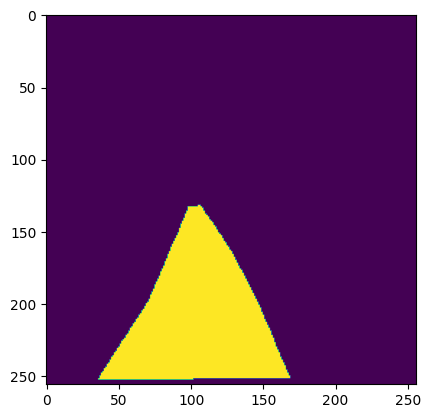

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


def convert_to_binary_mask(true_mask):
    road_label = np.array([255, 0, 255])
     
    binary_mask = np.all(mask == road_label, axis=-1).astype(np.uint8)

    return binary_mask


mask = cv2.imread(df_kitti_train['mask_path'][0])
mask = cv2.resize(mask,[256,256])
# mask.shape
road_label = np.array([255, 0, 255])
     
binary_mask = np.all(mask == road_label, axis=-1).astype(np.uint8)
plt.imshow(binary_mask)

In [ ]:
mask.min()

## Mississippi  Dataset

https://www.cavs.msstate.edu/resources/autonomous_dataset.php

Dataset location:

```
/hdd/team_2/Off-road_Autonomous_Driving_Segmentation_Dataset/CaSSed_Dataset_Final/real_world_data
```

In [ ]:
m_path = '/hdd/team_2/Off-road_Autonomous_Driving_Segmentation_Dataset/CaSSed_Dataset_Final/real_world_data/'
path_off_road_real = glob.glob(os.path.join(m_path, "**/raw_images/*"), recursive=True)

m_path = '/hdd/team_2/Off-road_Autonomous_Driving_Segmentation_Dataset/CaSSed_Dataset_Final/MAVS_Simulated_Data/'
path_off_road_simulated = glob.glob(os.path.join(m_path, "**/imgs/*.bmp"), recursive=True)




In [ ]:
output_dir = os.path.join(m_path,'images_png')
# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for bmp_file in path_off_road_simulated:

    
    img = cv2.imread(bmp_file)
    
    if img is not None:
        
        png_path = os.path.join(output_dir, os.path.splitext(bmp_file)[0] + '.png')
        cv2.imwrite(png_path, img)
       
    
print("Conversion complete.")

In [ ]:
path_off_road_simulated = glob.glob(os.path.join(m_path, "**/imgs/*.png"), recursive=True)

In [ ]:
path_off_road = path_off_road_simulated + path_off_road_real

In [ ]:
df_m = pd.DataFrame(columns=['rgb_path','target'])
df_m['rgb_path'] = path_off_road
df_m['target'] = 0

print(len(df_m))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_m_train, df_m_valid = train_test_split(df_m, test_size=0.20, random_state=42)

In [ ]:
print("len of train:",len(df_m_train))
print("len of valid:",len(df_m_valid))

# Yamaha V0 Dataset

https://theairlab.org/yamaha-offroad-dataset/

Dataset location:

```
/hdd/team_2/yamaha_v0
```

In [ ]:
y_path = '/hdd/team_2/yamaha_v0/'
images_train = os.path.join(y_path,'train')
path_off_road_train = glob.glob(os.path.join(images_train, "**/rgb.jpg"), recursive=True)
print(len(path_off_road_train))

In [ ]:
images_valid = os.path.join(y_path, 'valid')
path_off_road_valid = glob.glob(os.path.join(images_valid, "**/rgb.jpg"), recursive=True)

In [ ]:
df_train = pd.DataFrame(columns=['rgb_path','target'])
df_train['rgb_path'] = path_off_road_train
df_train['target'] = 0
df_yamaha_train = df_train.copy()
df_yamaha_train.head()

In [ ]:
df_valid = pd.DataFrame(columns=['rgb_path','target'])
df_valid['rgb_path'] = path_off_road_valid
df_valid['target'] = 0
df_yamaha_valid = df_valid.copy()
df_yamaha_valid.head()

# BDD Dataset

https://bdd-data.berkeley.edu/

Dataset location:

```
/hdd/team_2/KIA_DV/Datasets/on_off_road/on_road/BDD/bdd100k_images_100k
```

In [ ]:
bdd_path = '/hdd/team_2/KIA_DV/Datasets/on_off_road/on_road/BDD/bdd100k_images_100k/bdd100k/'
images_train = os.path.join(bdd_path,'images', 'train')
path_on_road_train = glob.glob(os.path.join(images_train, "**/*"), recursive=True)
print(len(path_on_road_train))

In [ ]:
images_valid = os.path.join(bdd_path,'images', 'val')
path_on_road_valid = glob.glob(os.path.join(images_valid, "**/*"), recursive=True)
print(len(path_on_road_valid))

In [ ]:
df_train = pd.DataFrame(columns=['rgb_path','target'])
df_train['rgb_path'] = path_on_road_train
df_train['target'] = 1
df_bdd_train = df_train.copy()
df_bdd_train.head()

In [ ]:
df_train = pd.DataFrame(columns=['rgb_path','target'])
df_train['rgb_path'] = path_on_road_valid
df_train['target'] = 1
df_bdd_valid = df_train.copy()
df_bdd_valid.head()

____

# Freiburg Dataset

https://paperswithcode.com/dataset/freiburg-forest

Dataset location:

```
/hdd/team_2/freiburg_forest
```

In [ ]:
f_path = '/hdd/team_2/freiburg_forest/'
images_train = os.path.join(f_path,'freiburg_forest_annotated', 'train','rgb')
print(images_train)
path_off_road_train = glob.glob(os.path.join(images_train, "**/*.jpg"), recursive=True)
print(len(path_off_road_train))

In [ ]:
images_valid = os.path.join(f_path,'freiburg_forest_annotated', 'test','rgb')
path_off_road_valid = glob.glob(os.path.join(images_valid, "**/*"), recursive=True)
print(len(path_off_road_valid))

In [ ]:
df_train = pd.DataFrame(columns=['rgb_path','target'])
df_train['rgb_path'] = path_off_road_train
df_train['target'] = 0
df_f_train = df_train.copy()
df_f_train.head()

In [ ]:
df_valid = pd.DataFrame(columns=['rgb_path','target'])
df_valid['rgb_path'] = path_off_road_valid
df_valid['target'] = 0
df_f_valid = df_valid.copy()
df_f_valid.head()

# Summary 

In [ ]:
print(df_kitti_train['rgb_path'][0])
print(df_kitti_valid['rgb_path'][0])

print(df_m['rgb_path'][0])
print(df_m_valid['rgb_path'][0])

print(df_yamaha_train['rgb_path'][0])
print(df_yamaha_valid['rgb_path'][0])

print(df_bdd_train['rgb_path'][0])
print(df_bdd_valid['rgb_path'][0])

print(df_f_train['rgb_path'][0])
print(df_f_valid['rgb_path'][0])

In [ ]:
print("len KITTI TRAIN: {}".format(len(df_kitti_train)))
print("len KITTI VAL: {}".format(len(df_kitti_valid)))
print("--")
print("len Mississipi TRAIN: {}".format(len(df_m_train)))
print("len Mississipi VAL: {}".format(len(df_m_valid)))
print("--")
print("len Yamaha TRAIN: {}".format(len(df_yamaha_train)))
print("len Yamaha VAL: {}".format(len(df_yamaha_valid)))
print("--")
print("len BDD TRAIN: {}".format(len(df_bdd_train)))
print("len BDD VAL: {}".format(len(df_bdd_valid)))
print("--")
print("len freiburg TRAIN: {}".format(len(df_f_train)))
print("len freiburg VAL: {}".format(len(df_f_valid)))
print("--")

In [ ]:
df_off_road_train = pd.concat([df_m_train,df_yamaha_train, df_f_train])
df_off_road_valid = pd.concat([df_m_valid,df_yamaha_valid,df_f_valid])

print("len OFF ROAD TRAIN: {}".format(len(df_off_road_train)))
print("len OFF ROAD VAL: {}".format(len(df_off_road_valid)))
print("TOTAL: {}".format(len(df_off_road_valid)+len(df_off_road_train)))

In [ ]:
df_on_road_train = pd.concat([df_kitti_train,df_bdd_train])
df_on_road_valid = pd.concat([df_kitti_valid,df_bdd_valid])

print("len ON ROAD TRAIN: {}".format(len(df_on_road_train)))
print("len ON ROAD VAL: {}".format(len(df_on_road_valid)))
print("TOTAL: {}".format(len(df_on_road_valid)+len(df_on_road_train)))

In [ ]:
import random

In [ ]:
# Set the seed for reproducibility (optional)
random.seed(42)

# Sample 4000 random rows from the dataframe
df_on_road_train = df_on_road_train.sample(n=8000, random_state=random.randint(0, 100000))
df_on_road_valid = df_on_road_valid.sample(n=2000, random_state=random.randint(0, 100000))

In [ ]:
print("len ON ROAD TRAIN: {}".format(len(df_on_road_train)))
print("len ON ROAD VAL: {}".format(len(df_on_road_valid)))
print("TOTAL: {}".format(len(df_on_road_valid)+len(df_on_road_train)))

In [ ]:
#####

In [ ]:
df_train = pd.concat([df_off_road_train,df_on_road_train])

In [ ]:
df_train

In [ ]:
df_valid = pd.concat([df_off_road_valid,df_on_road_valid])
df_valid

In [ ]:
print("NB TRAIN: {}".format(len(df_train)))
print("NB VAL: {}".format(len(df_valid)))
print("TOTAL: {}".format(len(df_train)+len(df_valid)))

In [ ]:
## Ratio

ratio_val  = len(df_valid) * 100 / len(df_train)
print("ratio val:", ratio_val)

ratio_train  = 100 - ratio_val
print("ratio train:", ratio_train)

In [ ]:
# Let's have 75% 15% 10%

In [ ]:
from sklearn.model_selection import train_test_split

df_valid, df_test = train_test_split(df_valid, test_size=0.45, random_state=42)

In [ ]:
df_train.to_csv("data_splits/train_path.csv")
df_valid.to_csv("data_splits/valid_path.csv")
df_test.to_csv("data_splits/test_path.csv")

In [12]:
import torch

In [13]:
def intersection_over_union(prediction, target):
    intersection = torch.logical_and(prediction, target)
    union = torch.logical_or(prediction, target)
    iou = torch.sum(intersection).float() / torch.sum(union).float()
    iou = iou.detach().cpu().numpy()
    return iou

In [17]:
def intersection_over_union_batch(predictions, targets):
    intersection = torch.logical_and(predictions, targets)
    union = torch.logical_or(predictions, targets)
    iou = torch.sum(intersection, dim=(1, 2)).float() / torch.sum(union, dim=(1, 2)).float()
    iou = iou.detach().cpu().numpy()
    iou = iou.mean()
    return iou

# Example usage with a batch of predictions and targets
predictions = torch.tensor([[[1, 0, 1],
                             [0, 1, 0],
                             [1, 0, 0]],
                            [[0, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]]], dtype=torch.bool)

targets = torch.tensor([[[1, 0, 0],
                         [0, 1, 1],
                         [1, 1, 0]],
                        [[0, 1, 1],
                         [1, 0, 0],
                         [0, 1, 1]]], dtype=torch.bool)

iou_batch = intersection_over_union_batch(predictions, targets)
print("IoU for each batch sample:", iou_batch)

IoU for each batch sample: 0.5833334


In [21]:
import torch

def intersection_over_union_batch(predictions, targets):
    intersection = torch.logical_and(predictions, targets)
    union = torch.logical_or(predictions, targets)
    iou = torch.sum(intersection, dim=(2, 3)).float() / torch.sum(union, dim=(2, 3)).float()
    return iou

# Example usage with a batch of predictions and targets
predictions = torch.randint(0, 2, size=(8, 1, 256, 256), dtype=torch.bool)
targets = torch.randint(0, 2, size=(8, 1, 256, 256), dtype=torch.bool)

iou_batch = intersection_over_union_batch(predictions, targets)
print("IoU for each batch sample:", iou_batch)


IoU for each batch sample: tensor([[0.3313],
        [0.3315],
        [0.3321],
        [0.3354],
        [0.3335],
        [0.3372],
        [0.3313],
        [0.3351]])


In [22]:
IoU_metrics = []

In [29]:
IoU = intersection_over_union_batch(predictions=predictions, targets=targets)
IoU = IoU.detach().cpu().numpy()
IoU_metrics.append(IoU.flatten())

In [30]:
IoU_metrics

[array([0.33130124, 0.33149004, 0.3321456 , 0.33539286, 0.33353636,
        0.33724982, 0.33125013, 0.3351458 ], dtype=float32),
 array([0.33130124, 0.33149004, 0.3321456 , 0.33539286, 0.33353636,
        0.33724982, 0.33125013, 0.3351458 ], dtype=float32),
 array([0.33130124, 0.33149004, 0.3321456 , 0.33539286, 0.33353636,
        0.33724982, 0.33125013, 0.3351458 ], dtype=float32)]

In [31]:
IoU_metrics = np.concatenate(IoU_metrics)

In [32]:
IoU_metrics

array([0.33130124, 0.33149004, 0.3321456 , 0.33539286, 0.33353636,
       0.33724982, 0.33125013, 0.3351458 , 0.33130124, 0.33149004,
       0.3321456 , 0.33539286, 0.33353636, 0.33724982, 0.33125013,
       0.3351458 , 0.33130124, 0.33149004, 0.3321456 , 0.33539286,
       0.33353636, 0.33724982, 0.33125013, 0.3351458 ], dtype=float32)

In [35]:
import numpy as np

def intersection_over_union_batch(predictions, targets):
    batch_size = predictions.shape[0]
    iou_batch = np.zeros(batch_size)
    
    for i in range(batch_size):
        prediction = predictions[i, 0]  # Take the first channel (assuming it's a binary mask)
        target = targets[i, 0]  # Take the first channel of target
        intersection = np.logical_and(prediction, target)
        union = np.logical_or(prediction, target)
        iou = np.sum(intersection) / np.sum(union)
        iou_batch[i] = iou
        
    return iou_batch

# Example usage with batch of predictions
predictions = np.random.randint(0, 2, size=(8, 1, 256, 256))  # Random binary masks
targets = np.random.randint(0, 2, size=(8, 1, 256, 256))  # Random binary masks

iou_batch = intersection_over_union_batch(predictions, targets)
print("IoU for each prediction in the batch:", iou_batch)


IoU for each prediction in the batch: [0.33314322 0.33279864 0.33571647 0.33614301 0.33217189 0.33452674
 0.33189198 0.33507469]


In [37]:
predictions.shape

(8, 1, 256, 256)

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt


targets = torch.load("targets.pt")
preds = torch.load("preds.pt")

In [10]:
preds.shape

(5, 1, 256, 256)

In [11]:
targets.shape

(5, 256, 256)

In [12]:
# # Apply thresholding to convert values to 0 or 1
# pred = preds[0,:,:,:]
binary_predictions = (preds > 0.5).astype(np.uint8)
binary_predictions.shape
binary_predictions = binary_predictions[1, 0,:,:]

In [13]:
binary_predictions.shape

(256, 256)

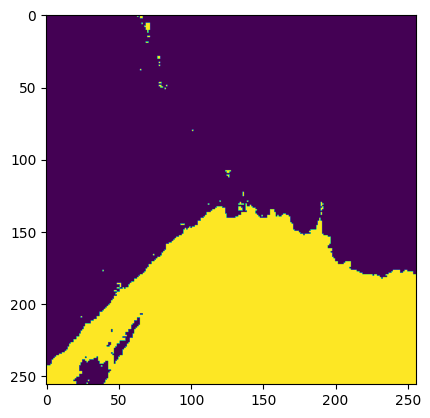

In [14]:
plt.imshow(binary_predictions)

In [15]:
target = targets[1,:,:]
target.shape

(256, 256)

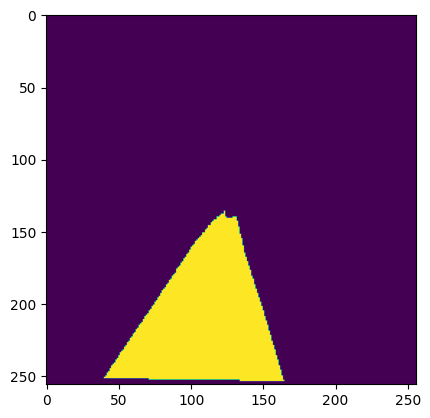

In [16]:
plt.imshow(target)

In [19]:
intersection = np.logical_and(binary_predictions, target)
union = np.logical_or(binary_predictions, target)
iou = np.sum(intersection) / np.sum(union)
iou

0.36775842044134727

In [31]:
binary_predictions = (preds > 0.5).astype(np.uint8)
binary_predictions.shape

for i in range(binary_predictions.shape[0]):
    target = targets[i,:,:]
    binary_mask = binary_predictions[i, 0,:,:]
    intersection = np.logical_and(binary_mask, target)
    union = np.logical_or(binary_mask, target)
    iou = np.sum(intersection) / np.sum(union)
    print(iou)


0.7048713004108326
0.36775842044134727
0.4520408163265306
0.46748278500382556
0.3728891401116371
